# Lesson I 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Does Time of day Affect arrest rate?

In chapter 1, we worked with small DataFrame of Apple Stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.

In [16]:
# Import packages
import pandas as pd

# Apple DataFrame
apple = pd.read_csv('datasets/apple.csv')

In [2]:
apple

,price,volume,date_and_time
0,174.35,20567800,2018-01-08 16:00:00
1,174.33.,21584000,2018-01-09 16:00:00
2,155.15,54390500,2018-02-08 16:00:00
3,156.41,70672600,2018-02-09 16:00:00
4,176.94,23774100,2018-03-08 16:00:00
5,179.98,32185200,2018-03-09 16:00:00


### Accessing datetime attributes
Lets convert the ``date_and_time`` column to a datetime format. So we can access to special data-based attributes via ``dt`` accesor.

For example, We can access the month as integer by using the ``dt.month`` attribute.

In [17]:
# Formatting 'date_and_time' column to a datetime
apple['date_and_time'] = pd.to_datetime(apple.date_and_time)

# Check the data types
print(apple.dtypes)

# Accessing the month value in datetime
print(apple.date_and_time.dt.month)

price                   float64
volume                    int64
date_and_time    datetime64[ns]
dtype: object
0    1
1    1
2    2
3    2
4    3
5    3
Name: date_and_time, dtype: int64


We can also set the ``date_and_time`` column as the DataFrame index. Now the data type will be a *DatetimeIndex*, we can still access the same datetime attributes, such as month, but we no longer need to use the ``dt`` accessor.

In [18]:
# Setting the index
apple.set_index('date_and_time', inplace=True)

# Check the index
print(apple.index)

# Check the month value of index
print(apple.index.month)

# Notice we didn't use the 'dt' accessor.

DatetimeIndex(['2018-01-08 16:00:00', '2018-01-09 16:00:00',
               '2018-02-08 16:00:00', '2018-02-09 16:00:00',
               '2018-03-08 16:00:00', '2018-03-09 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)
Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')


### Calculating the monthly mean price

Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the ``mean()`` method. But what if we wanted to calculate the mean price for each month? 

One idea would be to use a ``groupby()`` operation, but we can't group by month as a string since it's not a column in the DataFrame. Instead, we would group by ``apple.index.month``, and then take the ``mean()`` of the price column. 

This operation outputs a *Series*, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called ``monthly_price``.

In [21]:
# Convert price column into a float
apple['price'] = apple['price'].astype('float')

# Mean of all rows
apple.price.mean()

169.52666666666667

In [23]:
# Using groupby method to see mean of each month
monthly_price = apple.groupby(apple.index.month).price.mean()    

### Plotting the monhly mean price

Let's say that we wanted to plot this data in order to visually examine the monthly price trends. We would start by importing ``matplotlib.pyplot as plt``. Then, we call the ``plot()`` method on the ``monthly_price`` *Series*. 

The default plot for a Series is a **line plot**, which uses the Series index on the x-axis and the Series values on the y-axis. 

Finally, we'll label the axes and provide a title for the plot, and then use the ``show()`` function to display the plot.

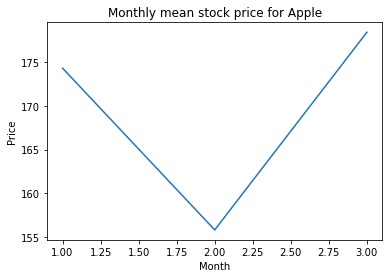

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot data
monthly_price.plot()

# Label the Axes and add a Tittle
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')

# Show plot
plt.show()

In [28]:
# Police DataFrame
ri = pd.read_csv('datasets/police.csv')

## Cleaning and validating DataFrame as in Chapter 1
# Dropping the county_name column
ri.drop('county_name', axis='columns', inplace=True)
# Dropping stop_date and stop time rows with missing values
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)
# Dropping state column
ri.drop('state', axis='columns', inplace=True)
# Dropping driver_gender rows with missing values
ri.dropna(subset=['driver_gender'], inplace=True)

## Changing the Data Types
# Change the is_arrested column into a bool type
ri['is_arrested'] = ri.is_arrested.astype('bool')
# Combined stop date and stop time into a one column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
# Convert combined column into a datetime
ri['stop_datetime'] = pd.to_datetime(combined)
# Set combined column into an index
ri.set_index('stop_datetime', inplace=True)
# Check the DataFrame
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Exercise

### Calculating the hourly Arrest Rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ``ri`` DataFrame. Then, you'll calculate the hourly arrest rate by using the ``hour`` attribute of the index. The hour ranges from 0 to 23, in which:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

In [32]:
# Calculate the Overall Arrest Rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


### PLotting the hourly Arrest Rate

In this exercise, you'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

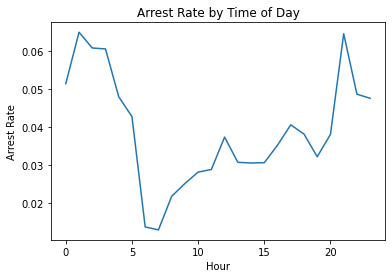

In [33]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the labels and tittle
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Show plot
plt.show()